In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy as sp

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
featsDF=pd.read_csv("/app/data/data.csv")

featsDF.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.450,7,-13.311,1,0.1930,0.604,0.000244,0.1870,0.7990,143.714
1,0.683,0.376,4,-13.612,1,0.0574,0.857,0.006670,0.1250,0.4140,116.022
2,0.511,0.318,10,-13.154,1,0.2010,0.759,0.000209,0.0640,0.3800,175.092
3,0.463,0.150,4,-14.888,0,0.0423,0.908,0.000016,0.0854,0.3360,169.001
4,0.485,0.207,4,-12.526,1,0.0416,0.837,0.000582,0.1120,0.2090,144.486
5,0.618,0.302,7,-17.499,1,0.1670,0.587,0.110000,0.1080,0.1150,84.352
6,0.595,0.756,3,-7.949,0,0.0434,0.759,0.010500,0.4500,0.5470,106.777
7,0.593,0.327,6,-12.489,1,0.0729,0.766,0.000060,0.0995,0.3300,143.143
8,0.550,0.163,11,-17.204,1,0.0533,0.294,0.004920,0.1020,0.0771,138.605
9,0.626,0.427,4,-10.720,0,0.0596,0.908,0.000006,0.1640,0.5630,116.917


### K Means Clustering

In [3]:
featsDFData=featsDF.loc[ : ,featsDF.columns != 'id']

kmeans=KMeans(n_clusters=4)
model=kmeans.fit(featsDFData)

featsDF["clusterLabel"] = model.labels_
print("Centroides de los clusters")
print(model.cluster_centers_)


Centroides de los clusters
[[ 5.98307692e-01  4.54538462e-01  5.53846154e+00 -1.15192308e+01
   8.46153846e-01  6.28000000e-02  3.92151615e-01  4.59875223e-02
   2.01907692e-01  5.01776923e-01  1.41928615e+02]
 [ 6.44600000e-01  4.69600000e-01  4.40000000e+00 -1.22082000e+01
   8.00000000e-01  5.10400000e-02  3.76754000e-01  1.28693010e-02
   1.47860000e-01  4.81500000e-01  9.64198000e+01]
 [ 4.84222222e-01  6.14777778e-01  4.55555556e+00 -9.93800000e+00
   7.77777778e-01  7.18888889e-02  2.33833602e-01  9.08997778e-02
   1.21744444e-01  6.60111111e-01  1.76761889e+02]
 [ 6.06055556e-01  5.88722222e-01  4.88888889e+00 -1.03522222e+01
   7.77777778e-01  6.35666667e-02  1.95762778e-01  3.03937894e-02
   1.60172222e-01  6.26888889e-01  1.21212000e+02]]


Text(0.5, 1.0, 'Acousticness vs Instrumentalness - Clusters K Means')

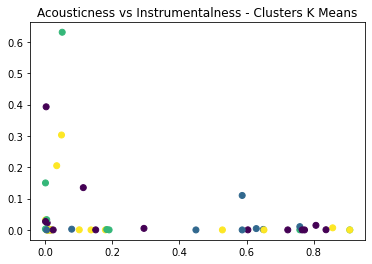

In [4]:
plt.scatter(featsDFData["acousticness"], featsDFData["instrumentalness"], c=featsDF["clusterLabel"])
plt.title("Acousticness vs Instrumentalness - Clusters K Means")

### Self Organizing Maps

In [5]:
featsArray=np.array(featsDFData)
featsArray


array([[ 6.58000e-01,  4.50000e-01,  7.00000e+00, -1.33110e+01,
         1.00000e+00,  1.93000e-01,  6.04000e-01,  2.44000e-04,
         1.87000e-01,  7.99000e-01,  1.43714e+02],
       [ 6.83000e-01,  3.76000e-01,  4.00000e+00, -1.36120e+01,
         1.00000e+00,  5.74000e-02,  8.57000e-01,  6.67000e-03,
         1.25000e-01,  4.14000e-01,  1.16022e+02],
       [ 5.11000e-01,  3.18000e-01,  1.00000e+01, -1.31540e+01,
         1.00000e+00,  2.01000e-01,  7.59000e-01,  2.09000e-04,
         6.40000e-02,  3.80000e-01,  1.75092e+02],
       [ 4.63000e-01,  1.50000e-01,  4.00000e+00, -1.48880e+01,
         0.00000e+00,  4.23000e-02,  9.08000e-01,  1.60000e-05,
         8.54000e-02,  3.36000e-01,  1.69001e+02],
       [ 4.85000e-01,  2.07000e-01,  4.00000e+00, -1.25260e+01,
         1.00000e+00,  4.16000e-02,  8.37000e-01,  5.82000e-04,
         1.12000e-01,  2.09000e-01,  1.44486e+02],
       [ 6.18000e-01,  3.02000e-01,  7.00000e+00, -1.74990e+01,
         1.00000e+00,  1.67000e-01,  5.87

In [6]:
from sklearn_som.som import SOM
from matplotlib.colors import ListedColormap


In [7]:

spotify_som = SOM(m=3, n=1, dim=11)

SOMClassification=spotify_som.fit(featsArray)

predictions=spotify_som.predict(featsArray)

featsLabel=["danceability","energy","key","loudness","mode", "speechiness", "acousticness","instrumentalness", "liveness", "valence", "tempo"]




Text(0.5, 1.0, 'Classes')

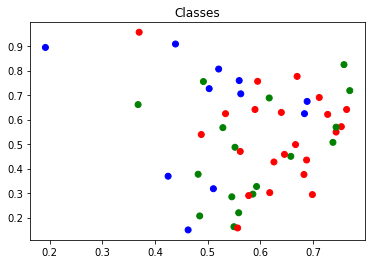

In [8]:

## Plot the results
x = featsArray[:,0]
y = featsArray[:,1]
colors = ['red', 'green', 'blue']

plt.scatter(x, y, c=predictions, cmap=ListedColormap(colors))
plt.title('Classes')

### PCA - Principal Components Analysis

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=11)
pca.fit(featsArray)


expl_variance=(pca.explained_variance_ratio_)

comp=(1,2,3,4,5,6,7,8,9,10,11)


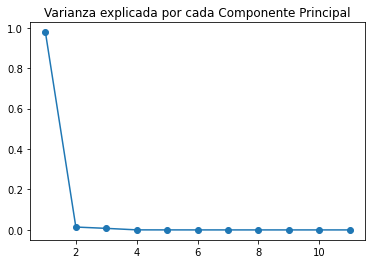

In [11]:
plt.scatter(x=comp, y=expl_variance )
plt.plot(comp, expl_variance )
plt.title("Varianza explicada por cada Componente Principal")
plt.show()